In [1]:
from src.soilpulse.dataset_loader import *
import matplotlib.pyplot as plt

In [2]:
RIES = load_sp_datapackage({"sourcedir": "catalogue/temp_4/"})
#sorted(get_dataset_concepts(TUBAF, vocab = optio))
#RIES

Text(0.5, 0, 'Experiment No')

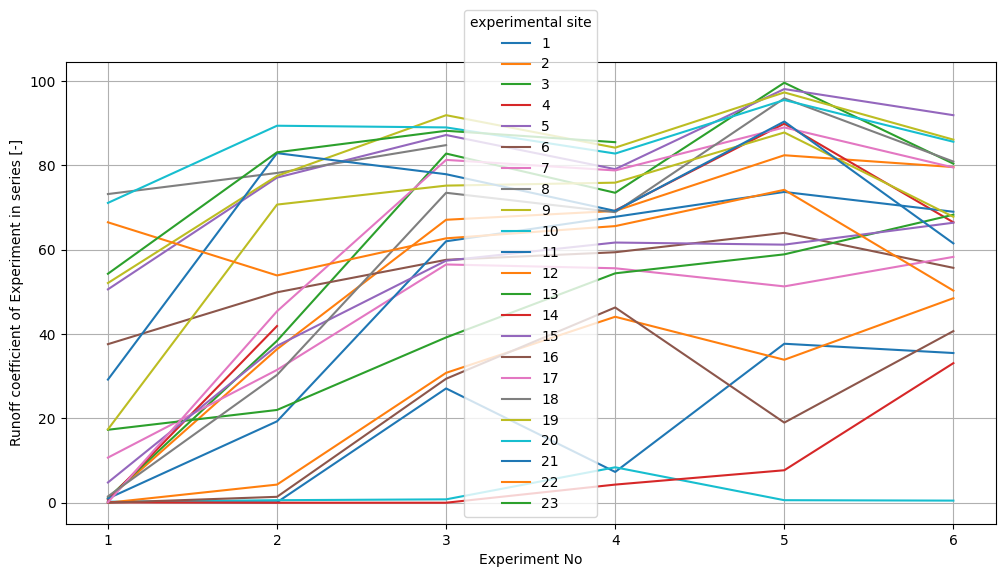

In [3]:
# select mean overland flow Runoff coefficients from RIES data
a = view_sp_resource(RIES.resources[1], fields = ['RC_OF_mean_selected'])
# without .open() and .close() the first call gets only the last experiments - for whatever frictionless reason
a.open()
a.close()

# convert this to pandas and draw a figure
b = a.to_pandas()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
for x in b.index.levels[0]:
    site_data = b.xs(x, level="Site_number")
    #site_data = b[b.index.get_level_values("Site_number") == x].reset_index()
    ax1.plot(site_data, label = x)
    #ax1.plot(site_data.Experiment_number, site_data.RC_OF_mean_selected, label=x)
ax1.grid()
ax1.legend(title = "experimental site")
ax1.set_ylabel("Runoff coefficient of Experiment in series [-]")
ax1.set_xlabel("Experiment No")

In [4]:
a_time = view_sp_resource(RIES.resources[2],
                          fields = ['Experiment_number', 'P_mean_selected', 'Q_OF_mean_selected'],
                          #row_filters = ['P_mean_selected > 1.5']
                         )
# without .open() and .close() the first call gets only the last experiments - for whatever frictionless reason
a_time.open()
a_time.close()
a_time

{'name': '3_experiment_time_series',
 'type': 'table',
 'data': [],
 'scheme': '',
 'format': 'inline',
 'mediatype': 'text/csv',
 'extrapaths': [],
 'schema': {'fields': [{'name': 'Date_time',
                        'type': 'datetime',
                        'description': ' Date and time in Central European '
                                       'Summer Time (CEST) = UTC +2 hours ',
                        'format': '%Y-%m-%d %H:%M',
                        'unit': 'yyyy-mm-ddhh',
                        'concept': ''},
                       {'name': 'Site_number',
                        'type': 'integer',
                        'description': ' ID number of experiment location ',
                        'unit': '1to23',
                        'concept': ''},
                       {'name': 'Experiment_number',
                        'type': 'string',
                        'description': ' ID number of experiment ',
                        'unit': '1to6',
                 

In [6]:
b_time = a_time.to_pandas()
b_time = b_time.reorder_levels(['Site_number','Date_time']).sort_index()
b_time.head()

Experiment_number  P_mean_selected  \
Site_number Date_time                                                
1           2016-08-16 00:01:00              None              0.0   
            2016-08-16 00:02:00              None              0.0   
            2016-08-16 00:03:00              None              0.0   
            2016-08-16 00:04:00              None              0.0   
            2016-08-16 00:05:00              None              0.0   

                                 Q_OF_mean_selected  
Site_number Date_time                                
1           2016-08-16 00:01:00                 0.0  
            2016-08-16 00:02:00                 0.0  
            2016-08-16 00:03:00                 0.0  
            2016-08-16 00:04:00                 0.0  
            2016-08-16 00:05:00                 0.0

Text(0.5, 0, 'Date')

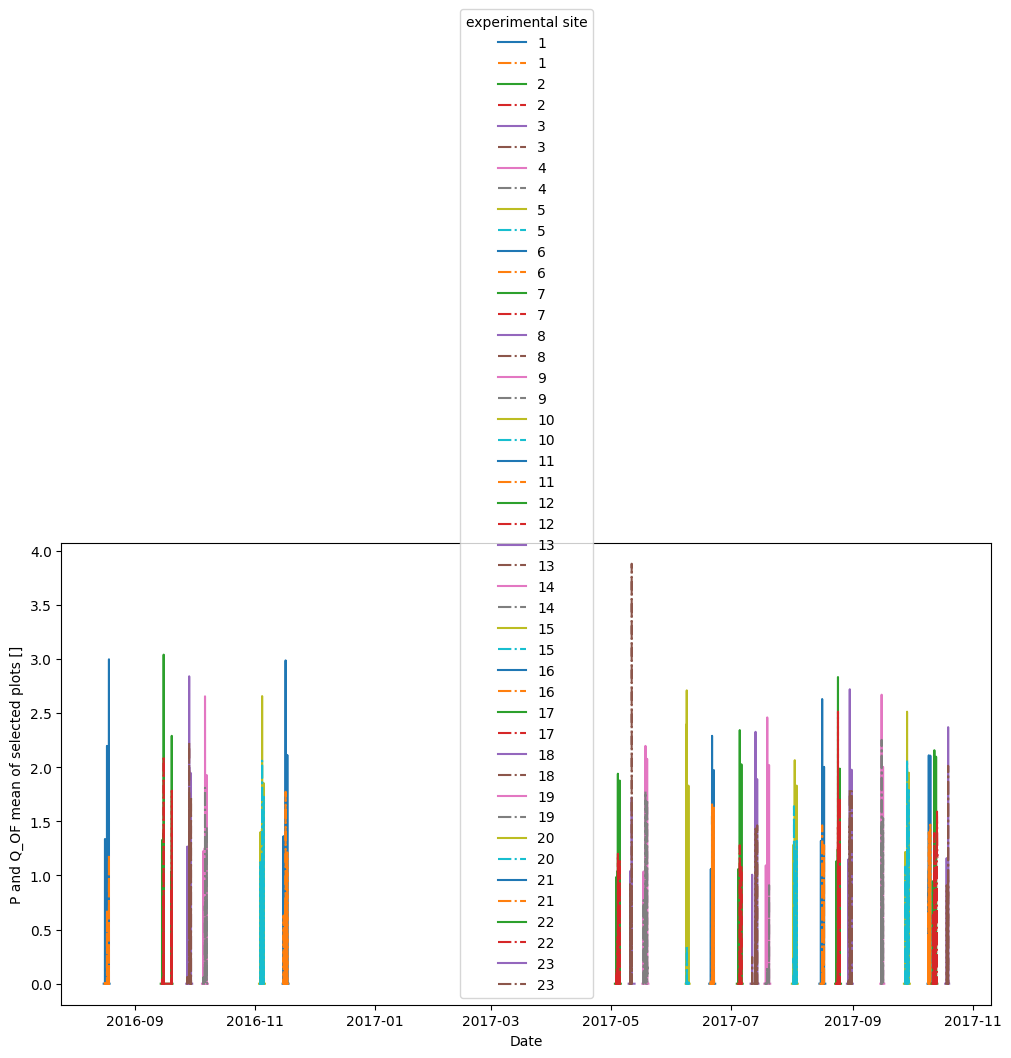

In [7]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
for x in b_time.index.levels[0]:
    site_data = b_time.xs(x, level="Site_number")
    #site_data = b[b.index.get_level_values("Site_number") == x].reset_index()
    ax1.plot(site_data.index, site_data.P_mean_selected, label = x)
    ax1.plot(site_data.index, site_data.Q_OF_mean_selected, label = x, linestyle = 'dashdot')
#ax1.grid()
ax1.legend(title = "experimental site")
ax1.set_ylabel("P and Q_OF mean of selected plots []")
ax1.set_xlabel("Date")

<AxesSubplot: xlabel='Date_time'>

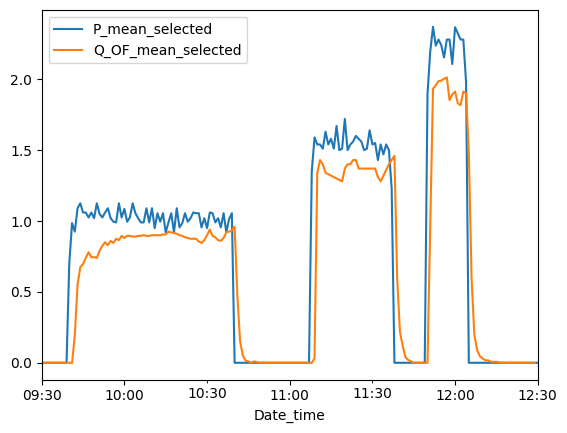

In [8]:
import pandas as pd
tst = pd.to_datetime('2017-10-19 09:30')
tnd = tst+pd.Timedelta(hours=3)

site_data.loc[tst:tnd].plot()

In [9]:
agg = b_time.pivot_table(values=["P_mean_selected","Q_OF_mean_selected"], columns=['Site_number','Experiment_number'], aggfunc='sum', dropna=True)
agg = agg.T
agg['RC'] = round(agg.Q_OF_mean_selected/ agg.P_mean_selected * 100, 1)
agg

P_mean_selected  Q_OF_mean_selected    RC
Site_number Experiment_number                                           
1           1                           66.702               0.114   0.2
            2                          132.738               0.117   0.1
            3                          118.112              32.044  27.1
            4                           60.483               4.430   7.3
            5                           60.251              22.724  37.7
...                                        ...                 ...   ...
23          2                           61.270              50.930  83.1
            3                           45.980              40.550  88.2
            4                           33.271              28.454  85.5
            5                            0.000               0.000   NaN
            6                            0.000               0.000   NaN

[138 rows x 3 columns]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False]
[ 0.2  0.1 27.1  7.3 37.7 35.5  0.9 36.4 67.1 69.2 82.4 79.6  1.1 38.4
 82.8 73.5 99.6 80.4  0.7 41.9  nan 69.3 89.9 66.5 50.6 77.1 87.2 79.1
 98.1 91.9 37.6 4

C:\Users\JL\AppData\Local\Temp\ipykernel_57876\3709138711.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(agg.RC.values/b.RC_OF_mean_selected.values)


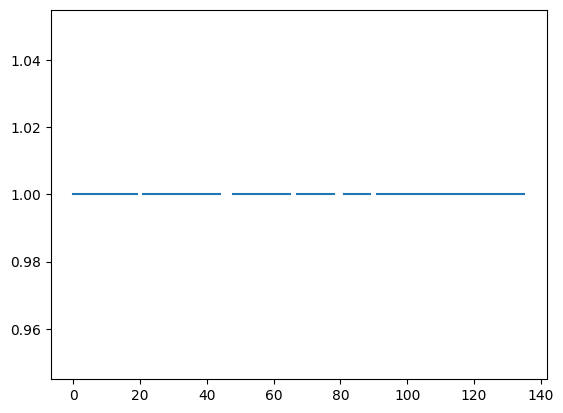

In [12]:
# All recalculated RC values divided by given values equal 1, so recalculation was successfull 
plt.plot(agg.RC.values/b.RC_OF_mean_selected.values)
print(agg.RC.values == b.RC_OF_mean_selected.values)
print(agg.RC.values)
print(b.RC_OF_mean_selected.values)

In [ ]:
TUBAF = load_sp_datapackage({"sourcedir": "catalogue/temp_1/"})
multitable = load_sp_datapackage({"sourcedir": "catalogue/temp_2/"})
Ries = load_sp_datapackage({"sourcedir": "catalogue/temp_4/"})
view_sp_resource(TUBAF.resources[0], fields = ['SigP'], row_filters = ['SigP >9', 'SigP < 12']).to_pandas()

get_dataset_concepts(TUBAF)
get_sp_data(TUBAF, fielddefinition=[{'name': 'SigP'}])
view = merge_foreign_keys(
    get_sp_data(
        TUBAF,
        fielddefinition=[
            {'name': 'SigP',
             'row_filters': ['No == "8"']
             },
            {'unit': 'g/l',
             'row_filters': ['not sedconc == None', 'No == "8"']
             }
            ]
        )
    )

view = get_sp_data(
    TUBAF,
    fielddefinition=[
        {'name': 'SigP',
         'row_filters': ['SigP > 10']
         },
        {'unit': 'g/l',
         'row_filters': ['not sedconc == None and sedconc >=300']
         }
        ]
    )


view = merge_foreign_keys(
    get_sp_data(
        TUBAF,
        fielddefinition=[
            {'name': 'SigP',
             'row_filters': ['No == "8"']
             },
            {'unit': 'g/l',
             'row_filters': ['not sedconc == None', 'No == "8"']
             }
            ]
        )
    )

try:
    view.extract()
except:
    view.extract()

# model requirements can be defined by row constraints
#from frictionless import validate, checks, transform
#validate(TUBAF.resources[0],
#         checks=[
#             checks.row_constraint(formula="fSi + mSi + cSi == SILT"),
#             checks.row_constraint(formula="fSa + mSa + cSa == SAND"),
#             checks.row_constraint(formula="SILT + SAND + CLAY == 100")
#             ]
#         )
TUBAF.resources[1].to_pandas().head()